In [4]:
from fastsolv import fastsolv
from pathlib import Path
import numpy as np
import pandas as pd
import polars as pl
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib
from matplotlib import pyplot as plt
import os
import matplotlib.lines as mlines
from fastsolv_analysis.util import query_fastsolv
import seaborn as sns

C:\Users\ChemeGrad2021\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\ChemeGrad2021\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\utilities\migration\utils.py:56: The loaded checkpoint was produced with Lightning v2.3.1, which is newer than your current Lightning version: v2.2.4


In [11]:
matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

colors = sns.color_palette(palette='Accent').as_hex()

Set source directory

In [6]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results")

Appendix B

In [7]:
df = pl.read_csv(Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\CombiSolu-Exp.csv"), columns=["solute_smiles", "solvent_smiles", "experimental_logS [mol/L]", "temperature", "source"]).to_pandas()
df = df.groupby(["solute_smiles", "solvent_smiles"])[["experimental_logS [mol/L]", "temperature", "source",]].aggregate(list)

In [8]:
vermiere_solprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "solprop_predictions/solprop_nonaq_vermeire_predictions.csv"))
vermiere_solprop_predictions = vermiere_solprop_predictions.groupby(["Solute", "Solvent"])[["logST (method1) [log10(mol/L)]", "Temp", "uncertainty logS298 [log10(mol/L)]"]].aggregate(list)

In [13]:
solute = 'C1C[C@H](NC1)C(=O)N'
df_test2 = query_fastsolv(df,solute, 270, 450 )
result2 = fastsolv(df_test2)
result_new2 = result2.reset_index(level =2)
result_grouped2 = result_new2.groupby(["solvent_smiles"])[["predicted_logS", "predicted_logS_stdev", 'temperature']].aggregate(list)

100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


<Figure size 640x480 with 0 Axes>

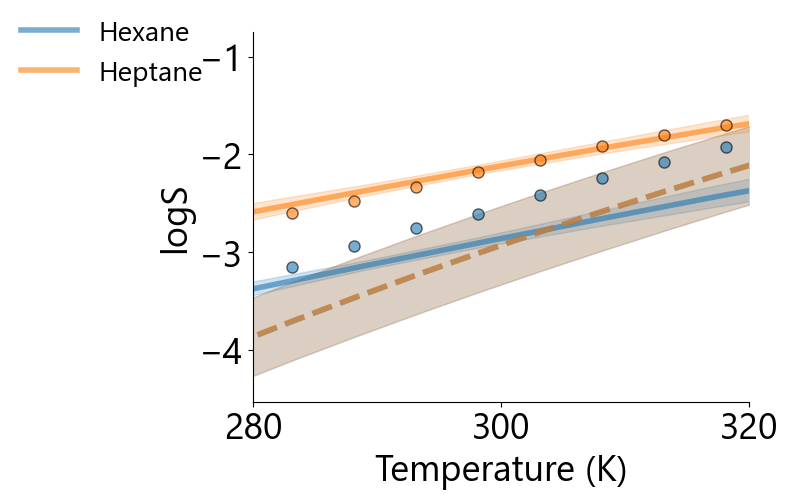

In [14]:
solute = 'C1C[C@H](NC1)C(=O)N'
plt.figure(figsize=[6.4,4.8])
fig, ax2 = plt.subplots()

for solvent, row in result_grouped2.iterrows():
    if len(df.loc[solute, solvent].temperature) > 5 and solvent != 'O' and (solvent == 'CCCCCC' or solvent == 'CCCCCCC'):
        if solvent == 'CCCCCC':
            name = 'Hexane'
        if solvent == 'CCCCCCC':
            name = 'Heptane'
        color = next(ax2._get_lines.prop_cycler)['color']
        ax2.plot(row.temperature, row.predicted_logS, linestyle = '-', linewidth = 4, markeredgecolor = 'black', alpha = 0.6, color = color, label=name)
        ax2.fill_between(row.temperature, np.subtract(row.predicted_logS, row.predicted_logS_stdev), np.add(row.predicted_logS ,row.predicted_logS_stdev) , alpha = 0.2, color = color)
        ax2.plot(df.loc[solute, solvent].temperature, df.loc[solute, solvent]['experimental_logS [mol/L]'], markersize = 8, marker= 'o', linestyle = 'none', markeredgecolor = 'black', color = color, alpha = 0.6)
        ax2.plot(vermiere_solprop_predictions.loc[solute, solvent].Temp, vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], 
                 marker = 'none', linestyle = '--', linewidth = 4, markeredgecolor = 'black', alpha = 0.6, color = color)
        ax2.fill_between(vermiere_solprop_predictions.loc[solute, solvent].Temp, np.subtract(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']), 
                         np.add(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']) , alpha = 0.2, color = color)



ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel("logS")
ax2.set_xlim([280, 320])
ax2.set_xticks([280, 300, 320])
#ax1.set_ylim([-4, 2])
ax2.legend(prop={'size': 20}, frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax2.spines[['right', 'top']].set_visible(False)

#ax1.text(304, 1, 'Solute')
#ax1.set_title("Solute", color='b')

plt.show()

In [15]:
solute = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'
df_test4 = query_fastsolv(df,solute, 270, 450)
result4 = fastsolv(df_test4)
result_new4 = result4.reset_index(level =2)
result_grouped4 = result_new4.groupby(["solvent_smiles"])[["predicted_logS", "predicted_logS_stdev", 'temperature']].aggregate(list)

100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 28.78it/s]


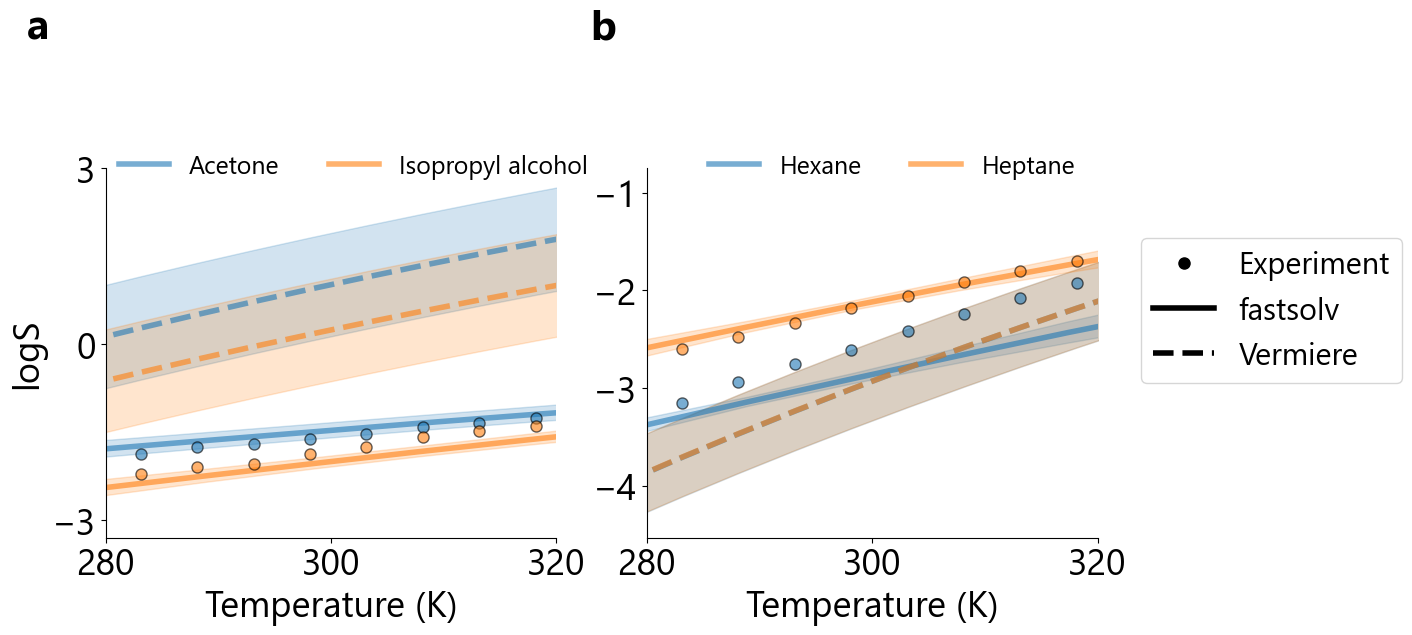

In [33]:
solute = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'

fig = plt.figure(figsize=(6.4*2, 4.8))  # Adjust the figure size 
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0), colspan=1)

for solvent, row in result_grouped4.iterrows():
    if len(df.loc[solute, solvent].temperature) > 5 and (solvent == 'CC(=O)C' or solvent == 'CC(C)O'):
        if solvent == 'CC(=O)C':
            name = "Acetone"
        if solvent == 'CC(C)O':
            name = "Isopropyl alcohol"
        color = next(ax1._get_lines.prop_cycler)['color']
        ax1.plot(row.temperature, row.predicted_logS, linestyle = '-', linewidth = 4, markeredgecolor = 'black', alpha = 0.6, color = color, label=name)
        ax1.fill_between(row.temperature, np.subtract(row.predicted_logS, row.predicted_logS_stdev), np.add(row.predicted_logS ,row.predicted_logS_stdev) , alpha = 0.2, color = color)
        ax1.plot(df.loc[solute, solvent].temperature, df.loc[solute, solvent]['experimental_logS [mol/L]'], markersize = 8, marker= 'o', linestyle = 'none', markeredgecolor = 'black', color = color, alpha = 0.6)
        vermiere_solprop_predictions.loc[solute, solvent].Temp.sort() #some points out of order
        vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'].sort()
        ax1.plot(vermiere_solprop_predictions.loc[solute, solvent].Temp, vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], 
                 marker = 'none', linestyle = '--', linewidth = 4, alpha = 0.6, color = color)
        ax1.fill_between(vermiere_solprop_predictions.loc[solute, solvent].Temp, np.subtract(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']), 
                         np.add(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']) , alpha = 0.2, color = color)


ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("logS")
ax1.set_xlim([280, 320])
ax1.set_xticks([280, 300, 320])
ax1.set_ylim([-3.3, 3])
ax1.set_yticks([-3, 0, 3])


ax1.legend(ncol = 2, prop={'size': 18}, frameon = False, loc = 'upper right', bbox_to_anchor=(1.12, 1.1)) 

# ax1.plot([], [], markersize = 8, marker= 'o', linestyle = 'none', markeredgecolor = 'black', color = 'black', label = 'Experiment')
# ax1.plot([], [], marker = 'none', linestyle = '-', linewidth = 4, color = 'black', label = 'FASTSOLV')
# ax1.plot([], [], marker = 'none', linestyle = '--', linewidth = 4, color = 'black', label = 'Vermiere')

# legend1 = ax1.legend(prop={'size': 20}, frameon = False)
# ax1.add_artist(legend1)
ax1.spines[['right', 'top']].set_visible(False)

ax1.text(273, 5.2, 'a', weight='bold', fontsize=30)
ax1.text(323, 5.2, 'b', weight='bold', fontsize=30)
#ax1.text(295, 5, "Risperidone",  fontsize = 25)
#ax1.text(304, 1, 'Solute')

solute = 'C1C[C@H](NC1)C(=O)N'
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1), colspan=1)

for solvent, row in result_grouped2.iterrows():
    if len(df.loc[solute, solvent].temperature) > 5 and solvent != 'O' and (solvent == 'CCCCCC' or solvent == 'CCCCCCC'):
        if solvent == 'CCCCCC':
            name = 'Hexane'
        if solvent == 'CCCCCCC':
            name = 'Heptane'
        color = next(ax2._get_lines.prop_cycler)['color']
        ax2.plot(row.temperature, row.predicted_logS, linestyle = '-', linewidth = 4, markeredgecolor = 'black', alpha = 0.6, color = color, label=name)
        ax2.fill_between(row.temperature, np.subtract(row.predicted_logS, row.predicted_logS_stdev), np.add(row.predicted_logS ,row.predicted_logS_stdev) , alpha = 0.2, color = color)
        ax2.plot(df.loc[solute, solvent].temperature, df.loc[solute, solvent]['experimental_logS [mol/L]'], markersize = 8, marker= 'o', linestyle = 'none', markeredgecolor = 'black', color = color, alpha = 0.6)
        ax2.plot(vermiere_solprop_predictions.loc[solute, solvent].Temp, vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], 
                 marker = 'none', linestyle = '--', linewidth = 4, markeredgecolor = 'black', alpha = 0.6, color = color)
        ax2.fill_between(vermiere_solprop_predictions.loc[solute, solvent].Temp, np.subtract(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']), 
                         np.add(vermiere_solprop_predictions.loc[solute, solvent]['logST (method1) [log10(mol/L)]'], vermiere_solprop_predictions.loc[solute, solvent]['uncertainty logS298 [log10(mol/L)]']) , alpha = 0.2, color = color)



ax2.set_xlabel("Temperature (K)")
#ax2.set_ylabel("logS")
ax2.set_xlim([280, 320])
ax2.set_xticks([280, 300, 320])
#ax1.set_ylim([-4, 2])
ax2.legend(ncol = 2, prop={'size': 18}, frameon = False, loc = 'upper right',bbox_to_anchor=(1, 1.1)) 
ax2.spines[['right', 'top']].set_visible(False)

legend_extra = [
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8, label='Experiment'),
    mlines.Line2D([], [], color='black', linestyle='-', linewidth=4, label=r'fastsolv'),
    mlines.Line2D([], [], color='black', linestyle='--', linewidth=4, label='Vermiere')
]

# Display legends on the right side of the figure
fig.legend(ncol = 1, prop={'size': 22}, handles=legend_extra, loc='lower right',bbox_to_anchor=(1.15, 0.4), frameon = True)
plt.show()

#orange-isopropanol
#blue- acetone

Calculate RMSE

In [56]:
#RMSE calculation 
solute_smiles = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'
squared_residuals = []
squared_residuals_solprop = []
for solvent_smiles in ["CC(=O)C", "CC(C)O"]:
    data = dict(
        solvent_smiles=[solvent_smiles]*len(df.loc[solute_smiles].loc[solvent_smiles].temperature),
        solute_smiles=[solute_smiles]*len(df.loc[solute_smiles].loc[solvent_smiles].temperature),
        temperature=df.loc[solute_smiles].loc[solvent_smiles].temperature,
    )
    df_input = pd.DataFrame(data)
    result = fastsolv(df_input)
    result = result.reset_index(level=2)
    result_grouped = result.groupby(["solvent_smiles"])[["predicted_logS", "predicted_logS_stdev", 'temperature']].aggregate(list)
    squared_residuals.append((np.subtract(result_grouped.loc[solvent_smiles].predicted_logS, df.loc[solute_smiles].loc[solvent_smiles]['experimental_logS [mol/L]']))**2)
    squared_residuals_solprop.append((np.subtract(result_grouped.loc[solvent_smiles].predicted_logS ,vermiere_solprop_predictions.loc[solute, solvent]["logST (method1) [log10(mol/L)]"]))**2)

rmse = np.sqrt(np.mean(squared_residuals))
print(rmse)

rmse_solprop = np.sqrt(np.mean(squared_residuals_solprop))
print(rmse_solprop)

100%|██████████| 2/2 [00:02<00:00,  1.47s/it]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.24it/s]


100%|██████████| 2/2 [00:02<00:00,  1.37s/it]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 43.44it/s]
0.1579075393505051
1.6403751123937238


In [60]:
#RMSE calculation 
solute_smiles = 'C1C[C@H](NC1)C(=O)N'
squared_residuals = []
squared_residuals_solprop = []

for solvent_smiles in ["CCCCCC", "CCCCCCC"]:
    data = dict(
        solvent_smiles=[solvent_smiles]*len(df.loc[solute_smiles].loc[solvent_smiles].temperature),
        solute_smiles=[solute_smiles]*len(df.loc[solute_smiles].loc[solvent_smiles].temperature),
        temperature=df.loc[solute_smiles].loc[solvent_smiles].temperature,
    )
    df_input = pd.DataFrame(data)
    result = fastsolv(df_input)
    result = result.reset_index(level=2)
    result_grouped = result.groupby(["solvent_smiles"])[["predicted_logS", "predicted_logS_stdev", 'temperature']].aggregate(list)
    squared_residuals.append((np.subtract(result_grouped.loc[solvent_smiles].predicted_logS, df.loc[solute_smiles].loc[solvent_smiles]['experimental_logS [mol/L]']))**2)
    squared_residuals_solprop.append((np.subtract(result_grouped.loc[solvent_smiles].predicted_logS ,vermiere_solprop_predictions.loc[solute, solvent]["logST (method1) [log10(mol/L)]"]))**2)

rmse = np.sqrt(np.mean(squared_residuals))
print(rmse)


rmse_solprop = np.sqrt(np.mean(squared_residuals_solprop))
print(rmse_solprop)

100%|██████████| 2/2 [00:02<00:00,  1.32s/it]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 33.56it/s]


100%|██████████| 2/2 [00:01<00:00,  1.00it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 55.52it/s]
0.25229568687373527
2.3255160301327495


Draw molecules for Figure

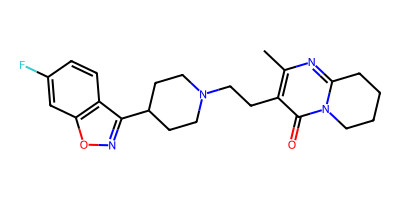

In [10]:
solute = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'

img = Draw.MolToImage(Chem.MolFromSmiles(solute), size=(400, 200))
img

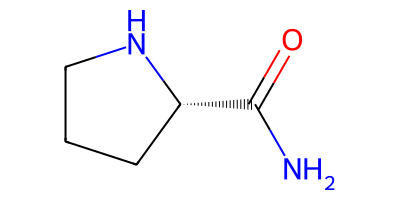

In [11]:
solute = 'C1C[C@H](NC1)C(=O)N'
img = Draw.MolToImage(Chem.MolFromSmiles(solute), size=(400, 200))
img

In [12]:
#Interesting example solutes to probe model performance
solute = 'C1(C(C(C(C(C1O)O)O)O)O)O'
solute = 'C[C@]12CC[C@@H](C([C@@H]1CC[C@@]3([C@@H]2CC=C4[C@]3(CC[C@@]5([C@H]4CC(CC5)(C)C)C(=O)O)C)C)(C)C)O'

#Interesting example solutes with high temperature data in SolProp
solute = 'C1/C(=C\C2=CC=CO2)/C(=O)/C(=C/C3=CC=CO3)/C1'
solute = 'C(CCC(=O)O)CC(=O)O'
solute = 'C1=CC(=CC=C1C(=O)O)C(=O)O'